In [1]:
!pip install nsepy

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
bleach 2.1.4 has requirement html5lib!=1.0b1,!=1.0b2,!=1.0b3,!=1.0b4,!=1.0b5,!=1.0b6,!=1.0b7,!=1.0b8,>=0.99999999pre, but you'll have html5lib 1.0b8 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# numpy and pandas for data manipulation
import numpy as np 
import pandas as pd

# nsepy to get stocks and index data
from nsepy import get_history
from datetime import date

# matplotlib for data visualization
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight') # matplotlib template for time series visualization

# setting fig size 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,14


In [3]:
infy_data = get_history(symbol ='INFY',start = date(2015,1,1),end = date(2015,12,31))
infy_data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [4]:
tcs_data = get_history(symbol = 'TCS',start = date(2015,1,1),end = date(2015,12,31))
tcs_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [5]:
niftyit_data = get_history(symbol = 'NIFTYIT',start = date(2015,1,1),end = date(2015,12,31),index = True)
niftyit_data.head()


,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


In [6]:
# getting data information and performing data cleaning through a function 
def data_preprocessing(df):
    print(df.info())
    if df.isnull().sum().sum():
        def missing_value_table(df):
            missing_values = df.isnull().sum()
            percent_missing_values = 100*df.isnull().sum()/len(df)
    
             # creating missing value table
            missing_val_table = pd.concat([missing_values,percent_missing_values],axis = 1)
    
            # rename the columns of the table
            ren_missing_val_table = missing_val_table.rename(columns = {0:'Missing Values',1:'% Missing Values'})
    
            # sorting the table in descending order of missing value
            ren_missing_val_table = ren_missing_val_table[ren_missing_val_table.iloc[:,1] != 0].sort_values('% Missing Values',ascending = False).round(1)
    
            print('No. of missing value containing columns are {} out of {}.\n'.format(str(ren_missing_val_table.shape[0]),str(data_df.shape[1])))
    
            return ren_missing_val_table
        print(missing_value_table(df))
    else: 
        print('\nNo missing value column in the data frame')


        



In [7]:
data_preprocessing(infy_data)

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 14 columns):
Symbol                248 non-null object
Series                248 non-null object
Prev Close            248 non-null float64
Open                  248 non-null float64
High                  248 non-null float64
Low                   248 non-null float64
Last                  248 non-null float64
Close                 248 non-null float64
VWAP                  248 non-null float64
Volume                248 non-null int64
Turnover              248 non-null float64
Trades                248 non-null int64
Deliverable Volume    248 non-null int64
%Deliverble           248 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 29.1+ KB
None

No missing value column in the data frame


In [8]:
data_preprocessing(tcs_data)

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 14 columns):
Symbol                248 non-null object
Series                248 non-null object
Prev Close            248 non-null float64
Open                  248 non-null float64
High                  248 non-null float64
Low                   248 non-null float64
Last                  248 non-null float64
Close                 248 non-null float64
VWAP                  248 non-null float64
Volume                248 non-null int64
Turnover              248 non-null float64
Trades                248 non-null int64
Deliverable Volume    248 non-null int64
%Deliverble           248 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 29.1+ KB
None

No missing value column in the data frame


In [9]:
data_preprocessing(niftyit_data)

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 6 columns):
Open        248 non-null float64
High        248 non-null float64
Low         248 non-null float64
Close       248 non-null float64
Volume      248 non-null int64
Turnover    248 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.6+ KB
None

No missing value column in the data frame


In [10]:
def data_formatting_ploting(df):
    df.index = pd.to_datetime(df.index)
    print(type(df.index))
    df['Date'] = df.index
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['Week_of_year'] = df.Date.dt.weekofyear
    print(df.head())
    print(df['Close'].plot())
    

    
    

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
           Symbol Series  Prev Close     Open     High     Low     Last  \
Date                                                                      
2015-01-01   INFY     EQ     1972.55  1968.95  1982.00  1956.9  1971.00   
2015-01-02   INFY     EQ     1974.40  1972.00  2019.05  1972.0  2017.95   
2015-01-05   INFY     EQ     2013.20  2009.90  2030.00  1977.5  1996.00   
2015-01-06   INFY     EQ     1995.90  1980.00  1985.00  1934.1  1965.10   
2015-01-07   INFY     EQ     1954.20  1965.00  1974.75  1950.0  1966.05   

              Close     VWAP   Volume      Turnover  Trades  \
Date                                                          
2015-01-01  1974.40  1971.34   500691  9.870306e+13   14908   
2015-01-02  2013.20  2003.25  1694580  3.394669e+14   54166   
2015-01-05  1995.90  2004.59  2484256  4.979911e+14   82694   
2015-01-06  1954.20  1954.82  2416829  4.724458e+14  108209   
2015-01-07  1963.55  1962.59  1812479  3.5

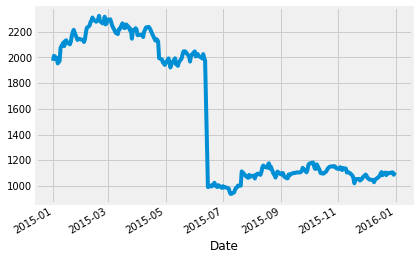

In [11]:
print(data_formatting_ploting(infy_data))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
           Symbol Series  Prev Close    Open     High      Low     Last  \
Date                                                                      
2015-01-01    TCS     EQ     2558.25  2567.0  2567.00  2541.00  2550.00   
2015-01-02    TCS     EQ     2545.55  2551.0  2590.95  2550.60  2588.40   
2015-01-05    TCS     EQ     2579.45  2581.0  2599.90  2524.65  2538.10   
2015-01-06    TCS     EQ     2540.25  2529.1  2529.10  2440.00  2450.05   
2015-01-07    TCS     EQ     2446.60  2470.0  2479.15  2407.45  2426.90   

              Close     VWAP   Volume      Turnover  Trades  \
Date                                                          
2015-01-01  2545.55  2548.51   183415  4.674345e+13    8002   
2015-01-02  2579.45  2568.19   462870  1.188740e+14   27585   
2015-01-05  2540.25  2563.94   877121  2.248886e+14   43234   
2015-01-06  2446.60  2466.90  1211892  2.989615e+14   84503   
2015-01-07  2417.70  2433.96  1318166  3.2

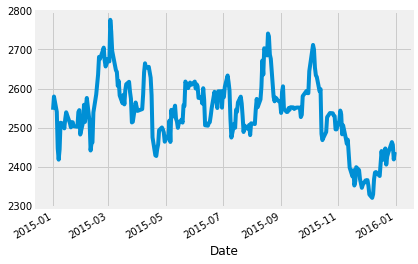

In [12]:
print(data_formatting_ploting(tcs_data))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                Open      High       Low     Close    Volume      Turnover  \
Date                                                                         
2015-01-01  11214.80  11235.75  11166.35  11215.70   4246150  3.575100e+09   
2015-01-02  11214.65  11399.10  11214.65  11372.10  10004862  9.645600e+09   
2015-01-05  11369.35  11433.75  11186.95  11248.55   8858018  1.059000e+10   
2015-01-06  11186.10  11186.10  10909.00  10959.90  12515739  1.364500e+10   
2015-01-07  11013.20  11042.35  10889.55  10916.00  10976356  1.203440e+10   

                 Date  Year  Month  Day  Week_of_year  
Date                                                   
2015-01-01 2015-01-01  2015      1    1             1  
2015-01-02 2015-01-02  2015      1    2             1  
2015-01-05 2015-01-05  2015      1    5             2  
2015-01-06 2015-01-06  2015      1    6             2  
2015-01-07 2015-01-07  2015      1    7             2  
AxesSub

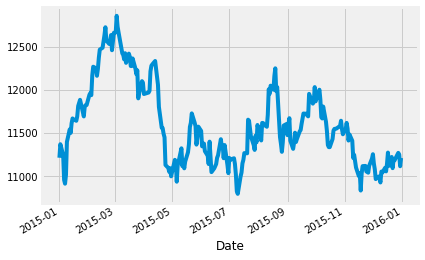

In [13]:
print(data_formatting_ploting(niftyit_data))

# Creating [4,16,...,52] Weeks Moving Average for closing Price 


In [14]:
infy_data.name = 'INFY'
tcs_data.name = 'TCS'
niftyit_data.name = 'NIFTYIT'
# creating a function to calculate week moving average for each stocks and index
def weekma_data(df,weeks = [4,16,28,40,52]):
    weekma_df = pd.DataFrame()
    # resampling time series data based on weekly frequency
    weekma_df['Close'] = df['Close'].resample('W').mean()
    
    for each in range(len(weeks)):
        moving_avg = weekma_df['Close'].rolling(weeks[each]).mean()
        weekma_df['MA for'+ str(weeks[each])+ 'weeks'] = moving_avg
        print('Moving Average for {} Week:\n\n{}'.format(weeks[each],weekma_df['MA for' + str(weeks[each]) + 'weeks']))
    weekma_df.plot(title = 'Moving Average for {}\n\n'.format(df.name))

    
              
    

Moving Average for 4 Week:

Date
2015-01-04            NaN
2015-01-11            NaN
2015-01-18            NaN
2015-01-25    2066.235000
2015-02-01    2103.313125
2015-02-08    2146.480625
2015-02-15    2188.145625
2015-02-22    2221.681250
2015-03-01    2255.998958
2015-03-08    2284.241458
2015-03-15    2263.721458
2015-03-22    2251.008333
2015-03-29    2231.787500
2015-04-05    2213.991667
2015-04-12    2212.904167
2015-04-19    2203.326667
2015-04-26    2179.184167
2015-05-03    2118.051875
2015-05-10    2057.684375
2015-05-17    1995.734375
2015-05-24    1977.131875
2015-05-31    1988.190000
2015-06-07    2005.050000
2015-06-14    2014.917500
2015-06-21    1756.177500
2015-06-28    1505.312500
2015-07-05    1246.970000
2015-07-12     987.242500
2015-07-19     982.917500
2015-07-26    1002.297500
2015-08-02    1022.817500
2015-08-09    1053.232500
2015-08-16    1090.757500
2015-08-23    1108.950000
2015-08-30    1112.727500
2015-09-06    1115.280000
2015-09-13    1101.812500
2015-

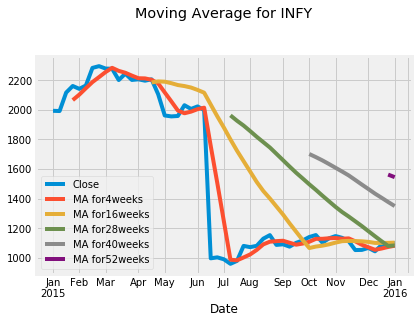

In [15]:
weekma_data(infy_data)

Moving Average for 4 Week:

Date
2015-01-04            NaN
2015-01-11            NaN
2015-01-18            NaN
2015-01-25    2515.817500
2015-02-01    2504.464375
2015-02-08    2522.176875
2015-02-15    2512.879375
2015-02-22    2546.825000
2015-03-01    2587.038542
2015-03-08    2631.784167
2015-03-15    2665.914167
2015-03-22    2650.476042
2015-03-29    2621.495625
2015-04-05    2579.400833
2015-04-12    2579.128333
2015-04-19    2579.807083
2015-04-26    2551.864583
2015-05-03    2535.106250
2015-05-10    2507.253750
2015-05-17    2491.182500
2015-05-24    2516.797500
2015-05-31    2547.405000
2015-06-07    2571.160000
2015-06-14    2581.772500
2015-06-21    2574.105000
2015-06-28    2565.820000
2015-07-05    2561.247500
2015-07-12    2562.475000
2015-07-19    2564.935000
2015-07-26    2554.092500
2015-08-02    2533.025000
2015-08-09    2525.500000
2015-08-16    2551.870000
2015-08-23    2594.865000
2015-08-30    2613.405000
2015-09-06    2621.170000
2015-09-13    2598.190000
2015-

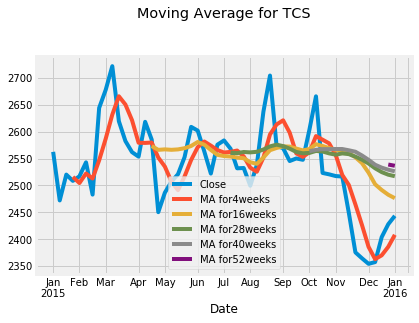

In [16]:
weekma_data(tcs_data)

Moving Average for 4 Week:

Date
2015-01-04             NaN
2015-01-11             NaN
2015-01-18             NaN
2015-01-25    11444.470000
2015-02-01    11567.988750
2015-02-08    11804.868750
2015-02-15    11979.983750
2015-02-22    12186.592500
2015-03-01    12381.436250
2015-03-08    12549.675000
2015-03-15    12570.822500
2015-03-22    12505.691250
2015-03-29    12389.886250
2015-04-05    12218.992500
2015-04-12    12160.572500
2015-04-19    12096.622500
2015-04-26    11930.410000
2015-05-03    11684.466250
2015-05-10    11427.131250
2015-05-17    11199.181250
2015-05-24    11217.878750
2015-05-31    11332.417500
2015-06-07    11397.670000
2015-06-14    11406.707500
2015-06-21    11318.967500
2015-06-28    11273.917500
2015-07-05    11217.175000
2015-07-12    11164.297500
2015-07-19    11156.207500
2015-07-26    11200.775000
2015-08-02    11268.652500
2015-08-09    11404.217500
2015-08-16    11586.350000
2015-08-23    11728.290000
2015-08-30    11726.942500
2015-09-06    11729.93

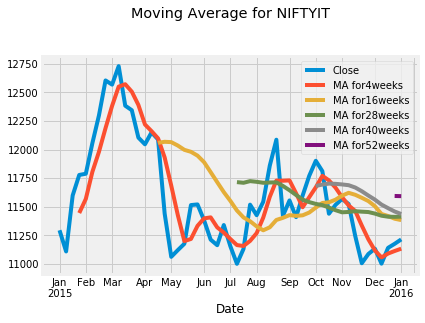

In [17]:
weekma_data(niftyit_data)

There are some missing date periodically and we are considering only STOCK MARKET HOLIDAY i.e. Saturday and Sunday.For that, we need to resample the data using 'df[col].asfreq()' function,that provides us option of padding(backwardfill/forwardfill missing values "not NaNs")

In [18]:
infy_data.name = 'INFY'
tcs_data.name = 'TCS'
niftyit_data.name = 'NIFTYIT'

def dayrw_data(df,window = [10,75]):
    dayrw_df = pd.DataFrame()
    dayrw_df['Close'] = df['Close'].asfreq('D',method = 'pad')
    
    for i in range(len(window)):
        rw = dayrw_df['Close'].rolling(window[i]).mean()
        dayrw_df['moving avg for' + str(window[i]) + 'rolling window'] = rw
        print('Moving Average for {} rolling window\n\n{}'.format(window[i],dayrw_df['moving avg for' + str(window[i]) + 'rolling window']))
    dayrw_df.plot(title = 'Moving Average for {}'.format(df.name))

Moving Average for 10 rolling window

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-10    2005.000
2015-01-11    2015.005
2015-01-12    2025.280
2015-01-13    2032.850
2015-01-14    2044.395
2015-01-15    2058.230
2015-01-16    2074.640
2015-01-17    2090.115
2015-01-18    2104.600
2015-01-19    2107.405
2015-01-20    2112.380
2015-01-21    2121.925
2015-01-22    2129.975
2015-01-23    2142.590
2015-01-24    2151.230
2015-01-25    2159.310
2015-01-26    2168.985
2015-01-27    2170.805
2015-01-28    2173.430
2015-01-29    2177.730
2015-01-30    2179.500
                ...   
2015-12-02    1061.505
2015-12-03    1061.910
2015-12-04    1062.700
2015-12-05    1063.490
2015-12-06    1063.155
2015-12-07    1061.145
2015-12-08    1058.950
2015-12-09    1055.135
2015-12-10    1051.080
2015-12-11    1048.460
2015-12-12    

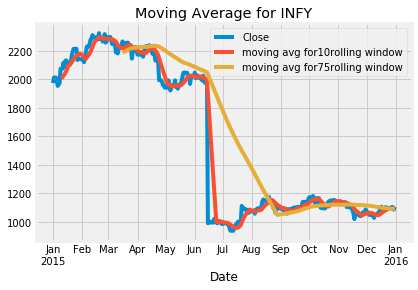

In [19]:
dayrw_data(infy_data)

Moving Average for 10 rolling window

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-10    2515.685
2015-01-11    2512.360
2015-01-12    2505.385
2015-01-13    2497.230
2015-01-14    2491.480
2015-01-15    2491.365
2015-01-16    2499.920
2015-01-17    2511.365
2015-01-18    2520.200
2015-01-19    2520.070
2015-01-20    2518.885
2015-01-21    2519.035
2015-01-22    2519.420
2015-01-23    2519.990
2015-01-24    2518.155
2015-01-25    2514.605
2015-01-26    2511.750
2015-01-27    2508.740
2015-01-28    2509.485
2015-01-29    2512.850
2015-01-30    2511.010
                ...   
2015-12-02    2362.435
2015-12-03    2358.405
2015-12-04    2354.450
2015-12-05    2350.495
2015-12-06    2348.780
2015-12-07    2345.425
2015-12-08    2342.990
2015-12-09    2344.420
2015-12-10    2346.405
2015-12-11    2348.815
2015-12-12    

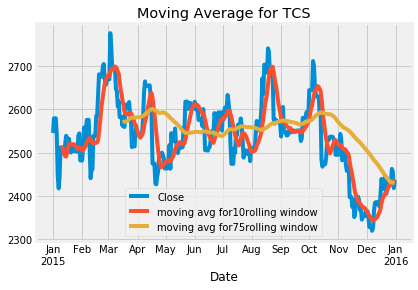

In [20]:
dayrw_data(tcs_data)

Moving Average for 10 rolling window

Date
2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
2015-01-10    11227.390
2015-01-11    11245.785
2015-01-12    11262.940
2015-01-13    11276.010
2015-01-14    11300.230
2015-01-15    11342.360
2015-01-16    11412.330
2015-01-17    11486.690
2015-01-18    11550.835
2015-01-19    11575.145
2015-01-20    11604.680
2015-01-21    11646.085
2015-01-22    11676.805
2015-01-23    11715.040
2015-01-24    11742.125
2015-01-25    11763.655
2015-01-26    11786.210
2015-01-27    11789.595
2015-01-28    11804.590
2015-01-29    11822.730
2015-01-30    11835.705
                ...    
2015-12-02    11125.945
2015-12-03    11122.015
2015-12-04    11113.185
2015-12-05    11104.355
2015-12-06    11096.965
2015-12-07    11084.540
2015-12-08    11070.435
2015-12-09    11051.150
2015-12-10    11036.1

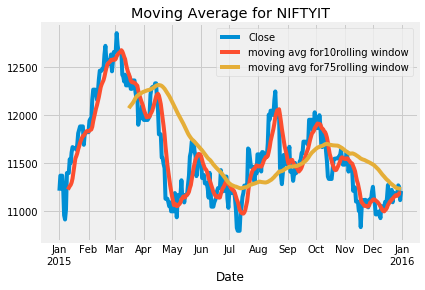

In [21]:
dayrw_data(niftyit_data)

Conclusion: As from above chart ploting, it can be seen that as the rolling window becomes smaller, the moving average becomes more close to actual closing data and the lags becomes lesser and lesser.


## Volume Shock

In [22]:
# creating Volume shock column through building local function
def volume_shock(df):
    df['prev_Volume'] = df.Volume.shift(1)
    df['Volume_shock'] = np.where(abs(df.Volume - df.prev_Volume)/(df.prev_Volume)*100 > 10,1,0)
    return df


In [23]:
volume_shock(infy_data).head(10)
volume_shock(tcs_data).head(10)
volume_shock(niftyit_data).head(10)



,Open,High,Low,Close,Volume,Turnover,Date,Year,Month,Day,Week_of_year,prev_Volume,Volume_shock
Date,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015-01-01,2015,1,1,1,NaN,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015-01-02,2015,1,2,1,4246150.0,1
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015-01-05,2015,1,5,2,10004862.0,1
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015-01-06,2015,1,6,2,8858018.0,1
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015-01-07,2015,1,7,2,12515739.0,1
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015-01-08,2015,1,8,2,10976356.0,1
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015-01-09,2015,1,9,2,12975117.0,1
2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,2015-01-12,2015,1,12,3,24812224.0,1
2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,2015-01-13,2015,1,13,3,16505074.0,1


## Volume Shock Direction

In [24]:
# creating volume shock direction 
def shock_direction(df):
    if df.Volume_shock == 0:
        pass
    else:
        if((df.Volume - df.prev_Volume) > 0):
            return 1
        else:
            return 0
def volshock_dir(df):
    df['Volshock_dir'] = 'Nan'
    df['Volshock_dir'] = df.apply(shock_direction,axis = 1)
    return df    

In [25]:
volshock_dir(infy_data)
volshock_dir(tcs_data)
volshock_dir(niftyit_data)

,Open,High,Low,Close,Volume,Turnover,Date,Year,Month,Day,Week_of_year,prev_Volume,Volume_shock,Volshock_dir
Date,,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015-01-01,2015,1,1,1,NaN,0,NaN
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015-01-02,2015,1,2,1,4246150.0,1,1.0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015-01-05,2015,1,5,2,10004862.0,1,0.0
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015-01-06,2015,1,6,2,8858018.0,1,1.0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015-01-07,2015,1,7,2,12515739.0,1,0.0
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015-01-08,2015,1,8,2,10976356.0,1,1.0
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015-01-09,2015,1,9,2,12975117.0,1,1.0
2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,2015-01-12,2015,1,12,3,24812224.0,1,0.0
2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,2015-01-13,2015,1,13,3,16505074.0,1,0.0


## Pricing Shock

In [26]:
def pricing_shock(df):
    df['Close_nxt'] = df.Close.shift(-1)
    df['Pricing_shock'] = np.where((abs(df['Close'] - df['Close_nxt'])/df['Close'] * 100) > 2,1,0)
    df['Price_black_swan'] = df['Pricing_shock']
    return df


In [27]:
pricing_shock(infy_data)
pricing_shock(tcs_data)
pricing_shock(niftyit_data)


,Open,High,Low,Close,Volume,Turnover,Date,Year,Month,Day,Week_of_year,prev_Volume,Volume_shock,Volshock_dir,Close_nxt,Pricing_shock,Price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015-01-01,2015,1,1,1,NaN,0,NaN,11372.10,0,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015-01-02,2015,1,2,1,4246150.0,1,1.0,11248.55,0,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015-01-05,2015,1,5,2,10004862.0,1,0.0,10959.90,1,1
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015-01-06,2015,1,6,2,8858018.0,1,1.0,10916.00,0,0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015-01-07,2015,1,7,2,12515739.0,1,0.0,11018.15,0,0
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015-01-08,2015,1,8,2,10976356.0,1,1.0,11399.65,1,1
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015-01-09,2015,1,9,2,12975117.0,1,1.0,11543.65,0,0
2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,2015-01-12,2015,1,12,3,24812224.0,1,0.0,11502.80,0,0
2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,2015-01-13,2015,1,13,3,16505074.0,1,0.0,11614.30,0,0


## Pricing Shock Direction

In [28]:
def closing_shock(df):
    if df['Pricing_shock'] == 0:
        pass
    else:
        if (df['Close'] - df['Close_nxt']) > 0 :
            return 1
        else:
            return 0 

def price_shock_dir(df):
    df['Priceshock_dir'] = 'Nan'
    df['Priceshock_dir'] = df.apply(closing_shock,axis = 1)
    df['blackswan_dir'] = df['Priceshock_dir']
    return df


In [29]:
price_shock_dir(infy_data)
price_shock_dir(tcs_data)
price_shock_dir(niftyit_data)


,Open,High,Low,Close,Volume,Turnover,Date,Year,Month,Day,Week_of_year,prev_Volume,Volume_shock,Volshock_dir,Close_nxt,Pricing_shock,Price_black_swan,Priceshock_dir,blackswan_dir
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015-01-01,2015,1,1,1,NaN,0,NaN,11372.10,0,0,NaN,NaN
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015-01-02,2015,1,2,1,4246150.0,1,1.0,11248.55,0,0,NaN,NaN
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015-01-05,2015,1,5,2,10004862.0,1,0.0,10959.90,1,1,1.0,1.0
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015-01-06,2015,1,6,2,8858018.0,1,1.0,10916.00,0,0,NaN,NaN
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015-01-07,2015,1,7,2,12515739.0,1,0.0,11018.15,0,0,NaN,NaN
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015-01-08,2015,1,8,2,10976356.0,1,1.0,11399.65,1,1,0.0,0.0
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015-01-09,2015,1,9,2,12975117.0,1,1.0,11543.65,0,0,NaN,NaN
2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,2015-01-12,2015,1,12,3,24812224.0,1,0.0,11502.80,0,0,NaN,NaN
2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,2015-01-13,2015,1,13,3,16505074.0,1,0.0,11614.30,0,0,NaN,NaN


## Pricing Shock w/o Volume Shock

In [30]:
# Pricing shock without volume shock 
def pshock_wo_vshock(df):
    df['not_volm_shock'] = (~(df.Volume_shock.astype(bool))).astype(int)
    df['Priceshock_wo_volshock'] = df['not_volm_shock'] & df['Pricing_shock']
    return df




In [31]:
pshock_wo_vshock(infy_data)
pshock_wo_vshock(tcs_data)
pshock_wo_vshock(niftyit_data)

,Open,High,Low,Close,Volume,Turnover,Date,Year,Month,Day,...,prev_Volume,Volume_shock,Volshock_dir,Close_nxt,Pricing_shock,Price_black_swan,Priceshock_dir,blackswan_dir,not_volm_shock,Priceshock_wo_volshock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015-01-01,2015,1,1,...,NaN,0,NaN,11372.10,0,0,NaN,NaN,1,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015-01-02,2015,1,2,...,4246150.0,1,1.0,11248.55,0,0,NaN,NaN,0,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015-01-05,2015,1,5,...,10004862.0,1,0.0,10959.90,1,1,1.0,1.0,0,0
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015-01-06,2015,1,6,...,8858018.0,1,1.0,10916.00,0,0,NaN,NaN,0,0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015-01-07,2015,1,7,...,12515739.0,1,0.0,11018.15,0,0,NaN,NaN,0,0
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015-01-08,2015,1,8,...,10976356.0,1,1.0,11399.65,1,1,0.0,0.0,0,0
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015-01-09,2015,1,9,...,12975117.0,1,1.0,11543.65,0,0,NaN,NaN,0,0
2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,2015-01-12,2015,1,12,...,24812224.0,1,0.0,11502.80,0,0,NaN,NaN,0,0
2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,2015-01-13,2015,1,13,...,16505074.0,1,0.0,11614.30,0,0,NaN,NaN,0,0


## Data Visualization using bokeh

In [32]:
import warnings
warnings.filterwarnings('ignore')
import bokeh
from bokeh.plotting import figure,show, output_file, output_notebook
from bokeh.palettes import Blues9,RdBu3,Spectral11
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper,HoverTool,value,LabelSet,Legend
import datetime


In [33]:
output_notebook()

Loading BokehJS ...

In [34]:
def timeseries_plot(df):
    p = figure(plot_width = 850, height = 300,title = 'time series for {}'.format(df.name),x_axis_type = 'datetime')
    p.line(df.Date,df.Close,color = 'blue',alpha = 0.5)
    
    # show price shock w/o volume shock
    p.circle(df.Date,df.Close*df.Priceshock_wo_volshock,size = 4,legend= 'price shock without volume shock')
    p.legend.location = 'bottom_left'
    show(p)
    
output_file('timeseries_plot.html')
timeseries_plot(infy_data)
timeseries_plot(tcs_data)
timeseries_plot(niftyit_data)

    

In [35]:
from statsmodels.tsa.stattools import acf, pacf

def pacf_plot(df):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(df.name))

    partial_autocorr = pacf(df["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [36]:
output_file('pacf_plot.html')
pacf_plot(infy_data)
pacf_plot(tcs_data)
pacf_plot(niftyit_data)


C:\Users\Abhinandan Kr. Roy\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 51), ('x', 50)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


C:\Users\Abhinandan Kr. Roy\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 51), ('x', 50)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


C:\Users\Abhinandan Kr. Roy\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 51), ('x', 50)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
